<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/Bayesian%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7">Introduction to Bayesian Linear Regression</a>

In the Bayesian viewpoint, we formulate linear regression using probability distributions rather than point estimates. The response, y, is not estimated as a single value, but is assumed to be drawn from a probability distribution. The model for Bayesian Linear Regression with the response sampled from a normal distribution is:

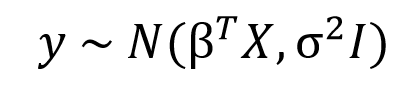

The output, y is generated from a normal (Gaussian) Distribution characterized by a mean and variance. The mean for linear regression is the transpose of the weight matrix multiplied by the predictor matrix. The variance is the square of the standard deviation σ (multiplied by the Identity matrix because this is a multi-dimensional formulation of the model).

**The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters**. Not only is the response generated from a probability distribution, but the model parameters are assumed to come from a distribution as well. The posterior probability of the model parameters is conditional upon the training inputs and outputs:

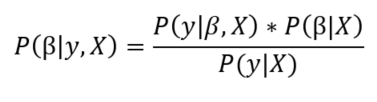

Here, P(β|y, X) is the posterior probability distribution of the model parameters given the inputs and outputs. This is equal to the likelihood of the data, P(y|β, X), multiplied by the prior probability of the parameters and divided by a normalization constant. This is a simple expression of Bayes Theorem, the fundamental underpinning of Bayesian Inference:

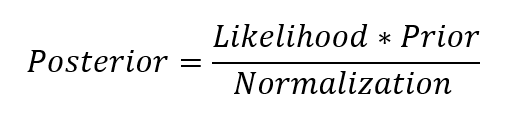

Here we can observe the two primary benefits of Bayesian Linear Regression.

*    Priors: If we have domain knowledge, or a guess for what the model parameters should be, we can include them in our model, unlike in the frequentist approach which assumes everything there is to know about the parameters comes from the data. If we don’t have any estimates ahead of time, we can use non-informative priors for the parameters such as a normal distribution.
*    Posterior: The result of performing Bayesian Linear Regression is a distribution of possible model parameters based on the data and the prior. This allows us to quantify our uncertainty about the model: if we have fewer data points, the posterior distribution will be more spread out.

***As the amount of data points increases, the likelihood washes out the prior, and in the case of infinite data, the outputs for the parameters converge to the values obtained from OLS.***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression

In [2]:
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data

In [3]:
lambda_ = 4.
w = np.zeros(n_features)

In [4]:
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)

In [5]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

In [6]:
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

In [7]:
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

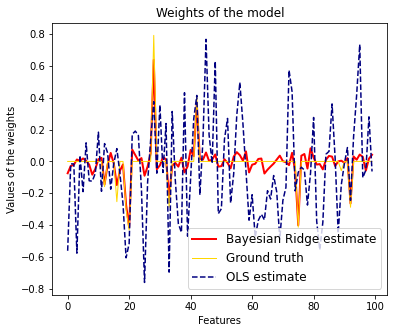

In [8]:
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='red', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=1, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

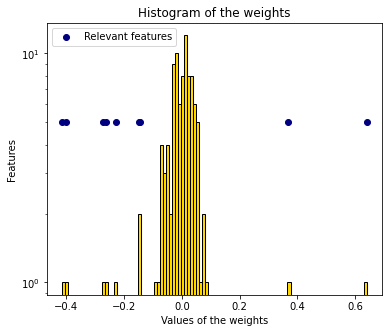

In [9]:
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

Text(0.5, 0, 'Iterations')

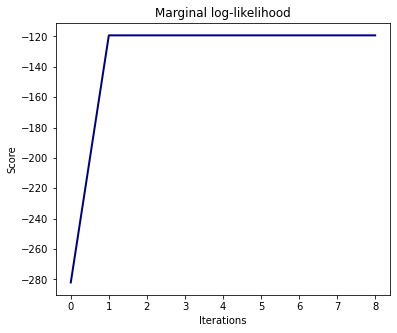

In [10]:
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

In [11]:
# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

In [12]:
degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [13]:
X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)

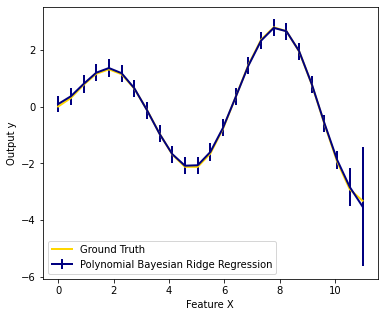

In [14]:
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

## Curve Fitting with Bayesian Ridge Regression

In [15]:
def func(x): return np.sin(2*np.pi*x)

In [16]:
# Generate sinusoidal data with noise
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 1., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 1., 100)

In [17]:
# Fit by cubic polynomial
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

In [18]:
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

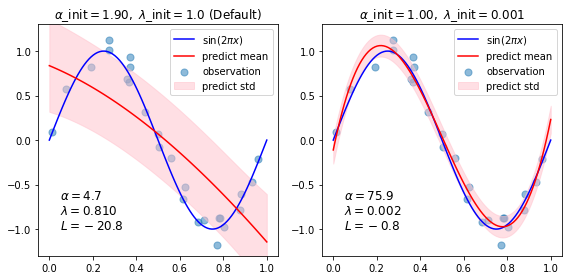

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

In general, when fitting a curve with a polynomial by Bayesian ridge regression, the selection of initial values of the regularization parameters (alpha, lambda) may be important. This is because the regularization parameters are determined by an iterative procedure that depends on initial values.

In this example, the sinusoid is approximated by a polynomial using different pairs of initial values.

When starting from the default values (alpha_init = 1.90, lambda_init = 1.), the bias of the resulting curve is large, and the variance is small. So, lambda_init should be relatively small (1.e-3) so as to reduce the bias.

Also, by evaluating log marginal likelihood (L) of these models, we can determine which one is better. It can be concluded that the model with larger L is more likely.